In [50]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline
import seaborn as sns

In [51]:
# Load the dataset
file_path = 'Data/Mall_Customers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
# Optional: Check for missing values and basic statistics
print("Missing values:\n", data.isnull().sum())
print("\nDataset statistics:\n", data.describe())

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Dataset statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [53]:
# Set styling
sns.set_palette("husl")

# Display first few rows and basic information
print("First few rows of the dataset:")
display(data.head())
print("\nDataset Info:")
display(data.info())
print("\nBasic statistics:")
display(data.describe())

First few rows of the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


None


Basic statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Numerical features: ['Annual Income (k$)', 'Spending Score (1-100)']


/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

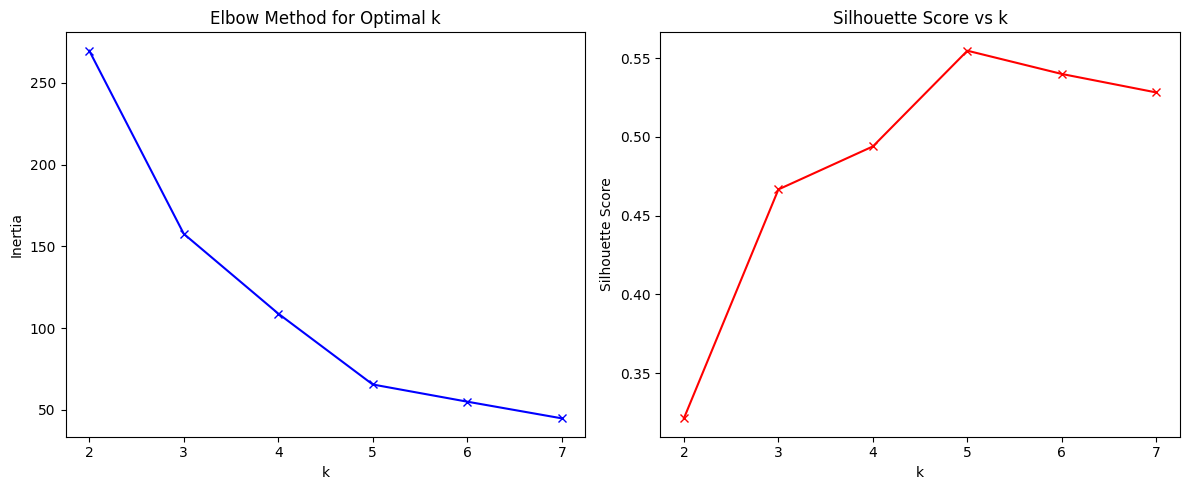

In [54]:
# Prepare data for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
print("Numerical features:", features)
X = data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
plt.figure(figsize=(12, 5))

# Plot 1: Elbow curve
plt.subplot(1, 2, 1)
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot 2: Silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.tight_layout()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


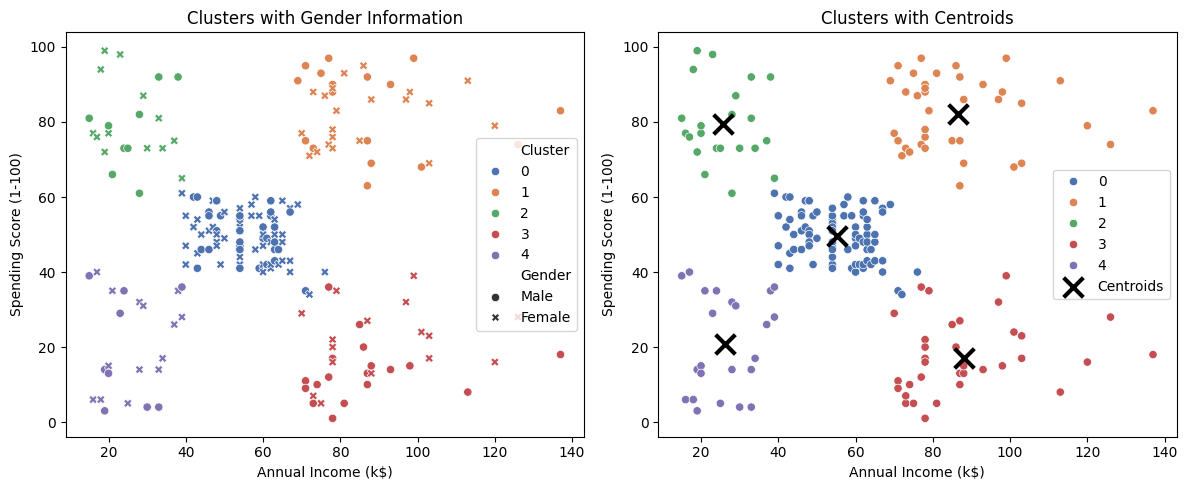


Cluster Analysis:


Age              Annual Income (k$)        Spending Score (1-100)  \
          mean    std count               mean    std                   mean   
Cluster                                                                        
0        42.72  16.45    81              55.30   8.99                  49.52   
1        32.69   3.73    39              86.54  16.31                  82.13   
2        25.27   5.26    22              25.73   7.57                  79.36   
3        41.11  11.34    35              88.20  16.40                  17.11   
4        45.22  13.23    23              26.30   7.89                  20.91   

                
           std  
Cluster         
0         6.53  
1         9.36  
2        10.50  
3         9.95  
4        13.02


Gender Distribution in Clusters:


Gender,Female,Male
Cluster,,
0,48,33
1,21,18
2,13,9
3,16,19
4,14,9



Results saved to 'clustering_results.csv'


In [55]:
# Perform K-means clustering with optimal k (let's use k=3 for this example)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clustering results
plt.figure(figsize=(12, 5))

# Plot 1: Clusters with original features
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x=features[0], y=features[1], hue='Cluster', style='Gender', palette='deep')
plt.title('Clusters with Gender Information')

# Plot 2: Centroids in original feature space
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x=features[0], y=features[1], hue='Cluster', palette='deep')
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=200, linewidth=3, label='Centroids')
plt.title('Clusters with Centroids')
plt.legend()
plt.tight_layout()
plt.show()

# Cluster analysis
print("\nCluster Analysis:")
cluster_stats = data.groupby('Cluster').agg({
    'Age': ['mean', 'std', 'count'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std']
}).round(2)
display(cluster_stats)

# Gender distribution in clusters
gender_dist = pd.crosstab(data['Cluster'], data['Gender'])
print("\nGender Distribution in Clusters:")
display(gender_dist)

# Save results
data.to_csv('Mall_Customers_clustering_results.csv', index=False)
print("\nResults saved to 'clustering_results.csv'")